In [8]:
# import the necessary libraries
import pandas as pd 
import numpy as np

# Load the dataset
df = pd.read_csv("../data/HEA.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleaning

C:\Users\Beab\AppData\Local\Temp\ipykernel_19016\4042874493.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\Beab\AppData\Local\Temp\ipykernel_19016\4042874493.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

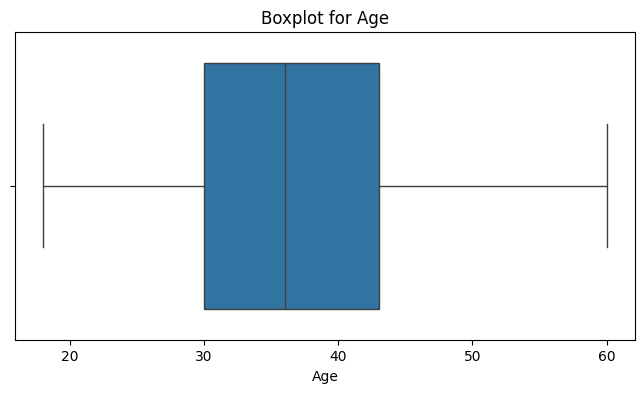

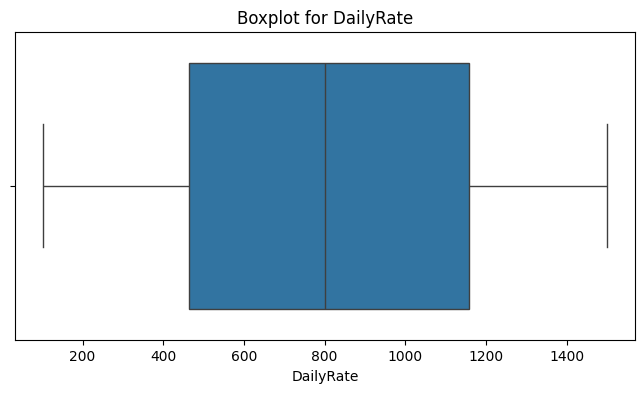

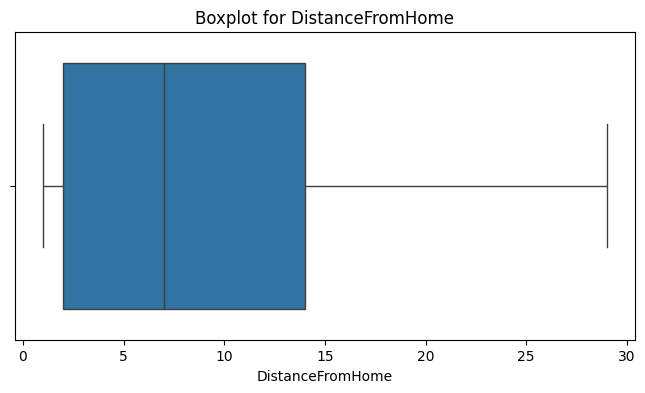

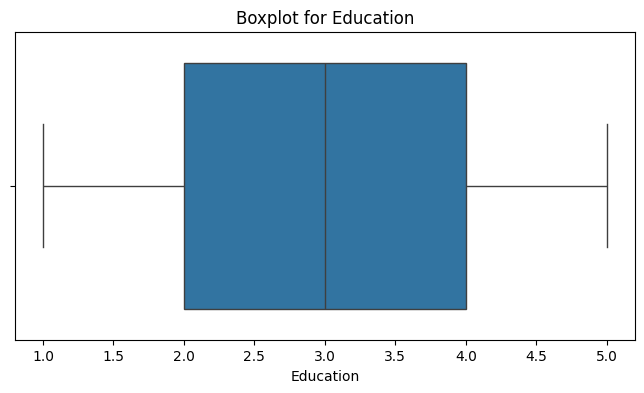

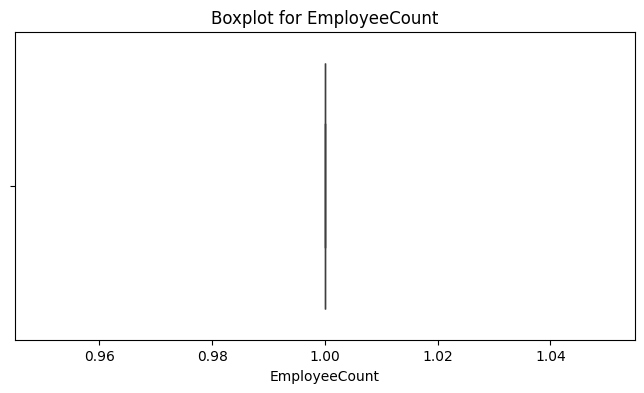

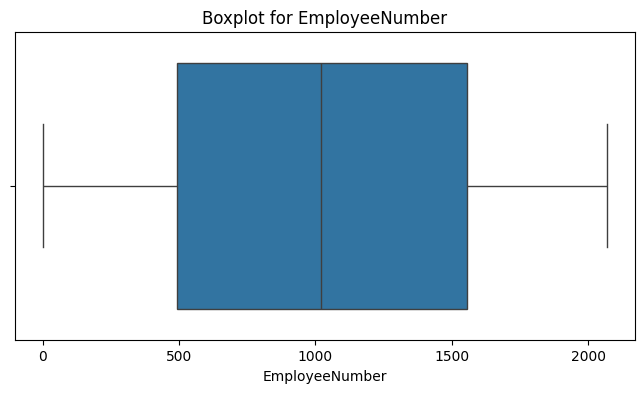

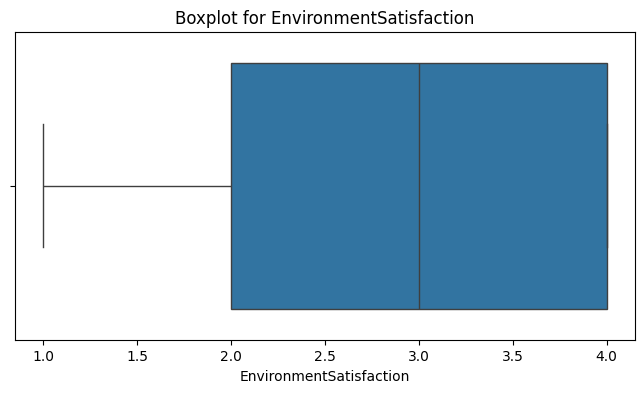

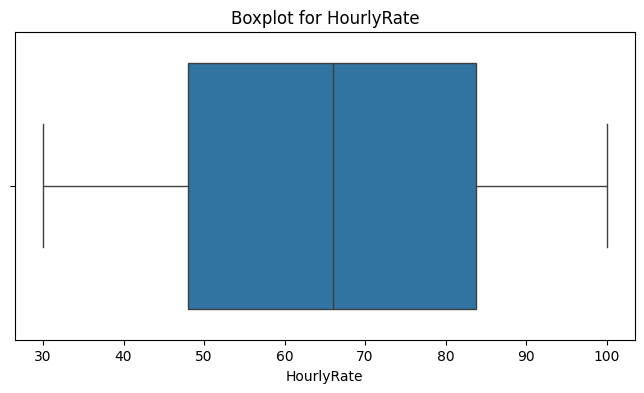

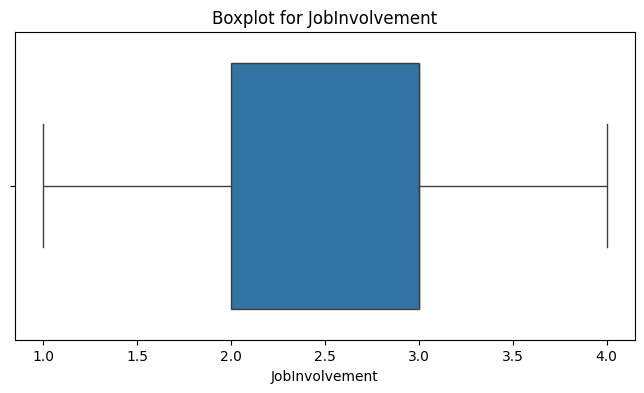

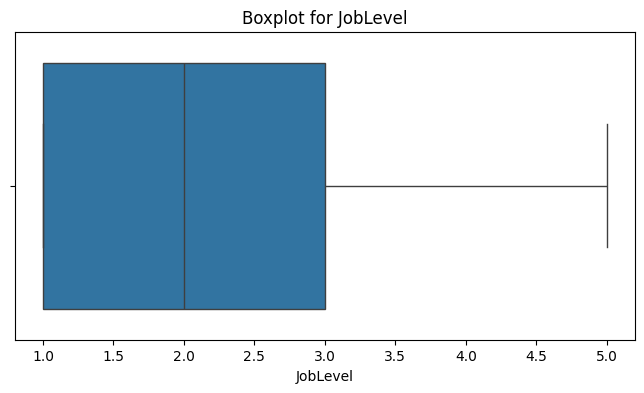

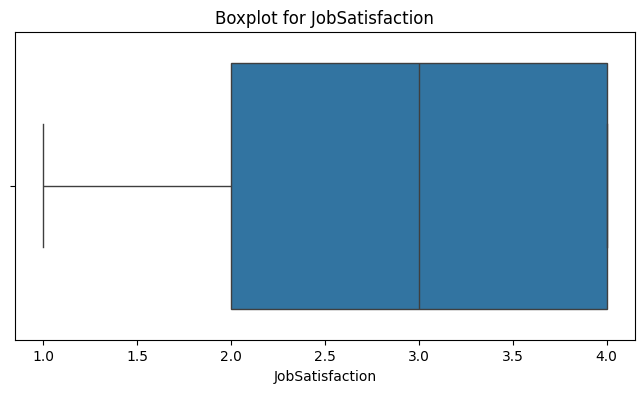

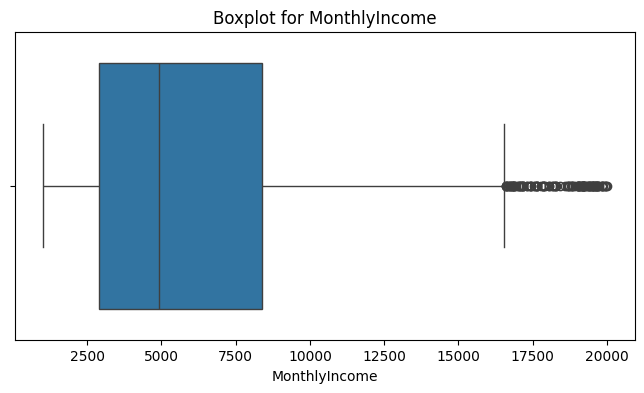

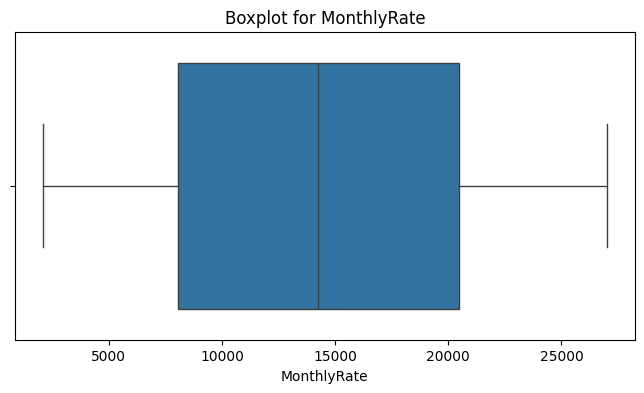

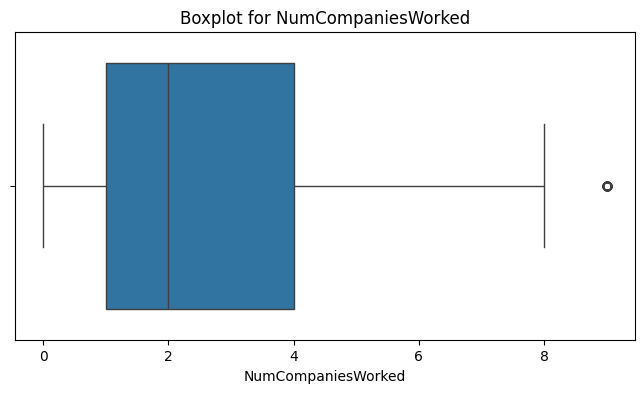

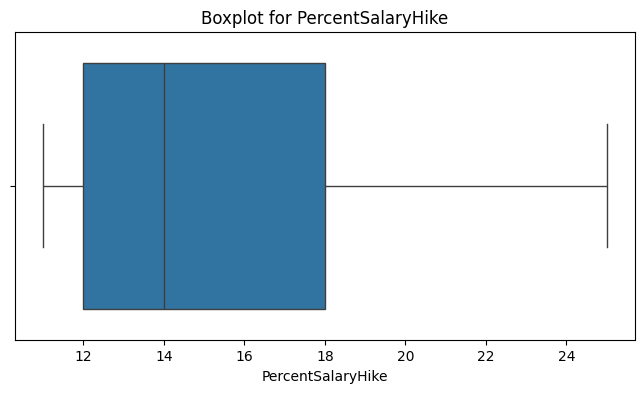

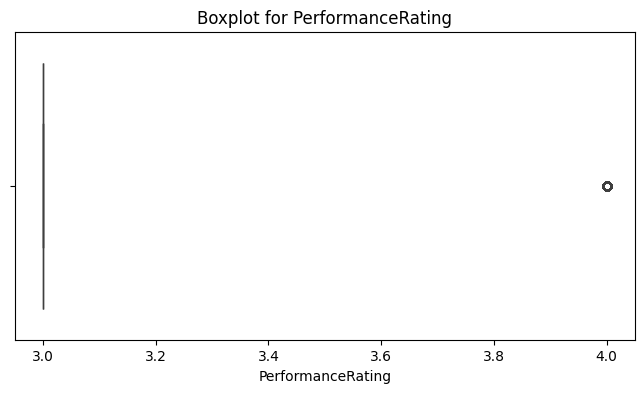

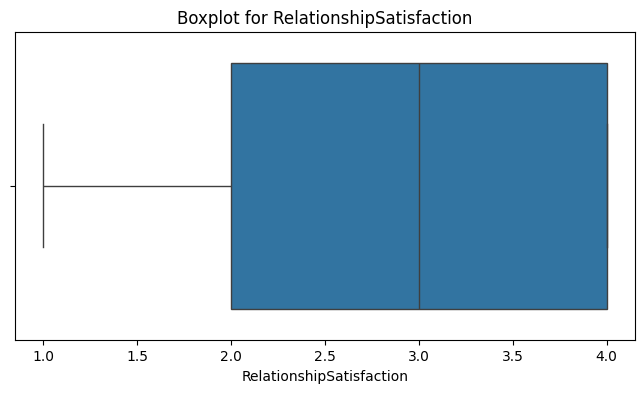

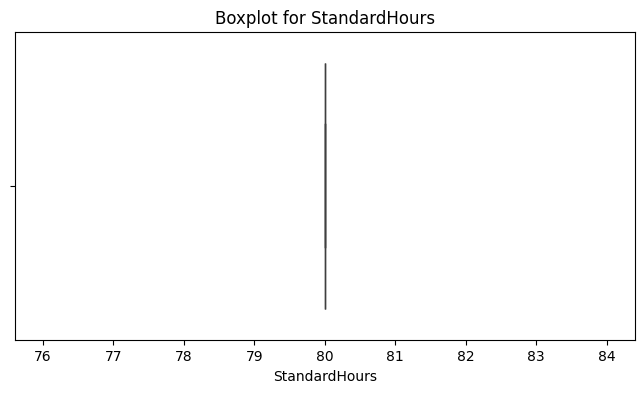

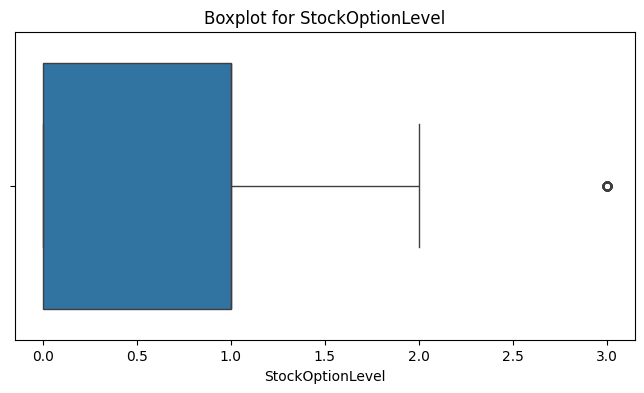

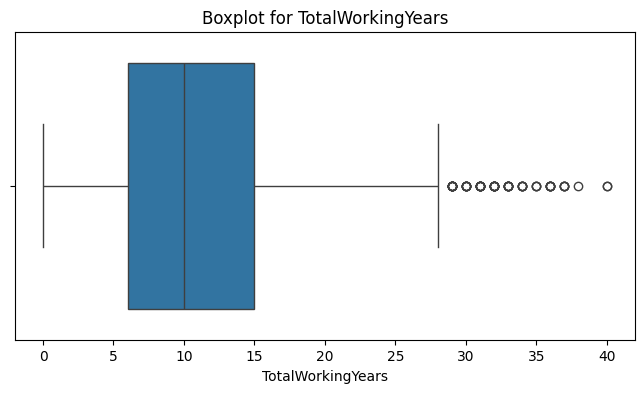

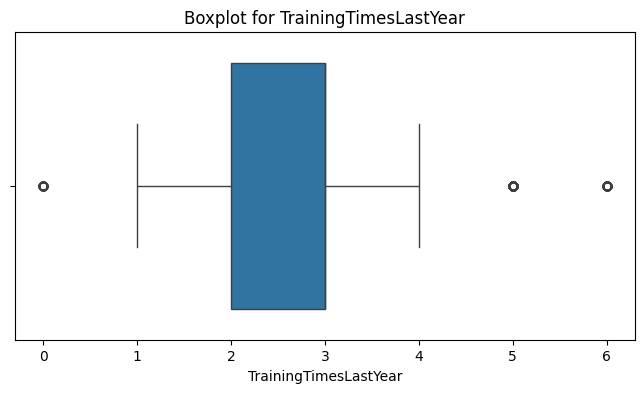

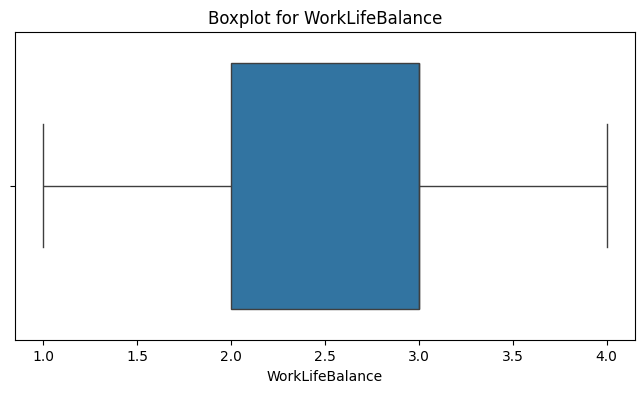

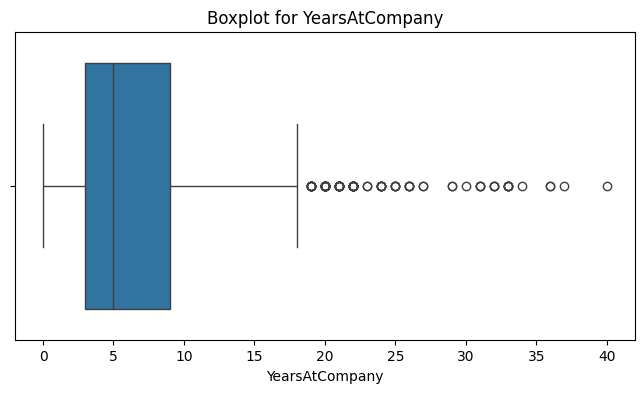

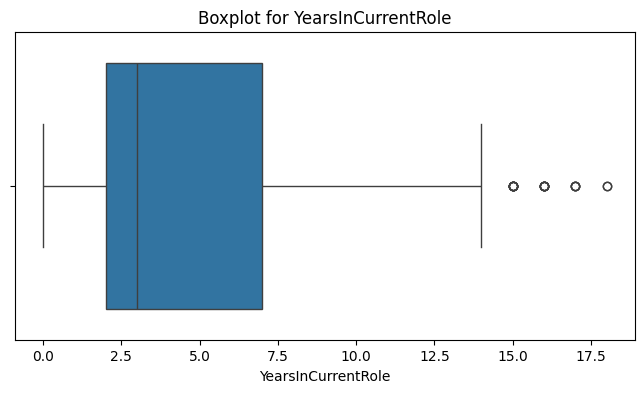

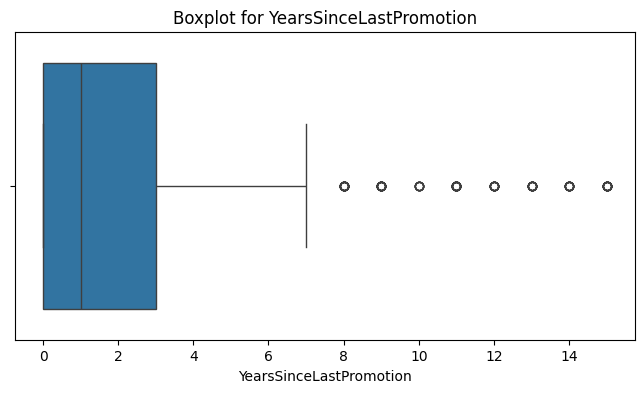

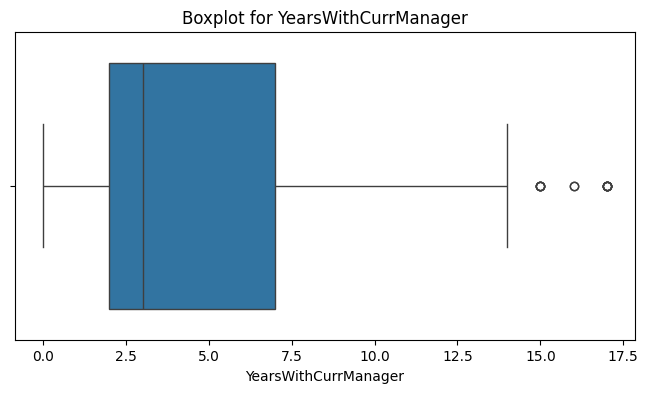

Data cleaning completed. Cleaned dataset saved as 'cleaned_data.csv'.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Assuming the dataset is loaded in a variable `df`)
# df = pd.read_csv('raw_data.csv') # Uncomment if reading from a file

# 1. Handle Missing Values
# Numerical columns: Replace missing values with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Categorical columns: Replace missing values with the mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# 2. Remove Duplicates
df.drop_duplicates(inplace=True)

# 3. Manage Outliers
# Using boxplots to visualize outliers in numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# remove outliers based on IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# 4. Data Type Conversion
# Ensure proper data types for specific labeled columns
labeled_columns = {
    'Education': 'category',
    'EnvironmentSatisfaction': 'category',
    'JobInvolvement': 'category',
    'JobSatisfaction': 'category',
    'PerformanceRating': 'category',
    'RelationshipSatisfaction': 'category',
    'WorkLifeBalance': 'category'
}

for col, dtype in labeled_columns.items():
    df[col] = df[col].astype(dtype)

# Save the cleaned dataset
df.to_csv('../data/cleaned_data.csv', index=False)

print("Data cleaning completed. Cleaned dataset saved as 'cleaned_data.csv'.")


# EDA

**Caption**: This bar chart shows the distribution of attrition across different job roles. Some roles like Sales Executive have higher attrition.
**Caption**: The histogram reveals the distribution of monthly income, with a concentration of employees earning below 10,000.


C:\Users\Beab\AppData\Local\Temp\ipykernel_19016\1459989872.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WorkLifeBalance', y='JobSatisfaction', palette='viridis')


**Caption**: The boxplot indicates that employees with a better work-life balance tend to report higher job satisfaction.
**Caption**: The line plot highlights a positive correlation between education level and average monthly income.
**Caption**: The heatmap shows correlations between numerical variables, revealing strong relationships like MonthlyRate and DailyRate.


C:\Users\Beab\AppData\Local\Temp\ipykernel_19016\1459989872.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='EnvironmentSatisfaction', palette='cool')


**Caption**: Most employees rate their environment satisfaction as High or Very High, indicating general contentment.


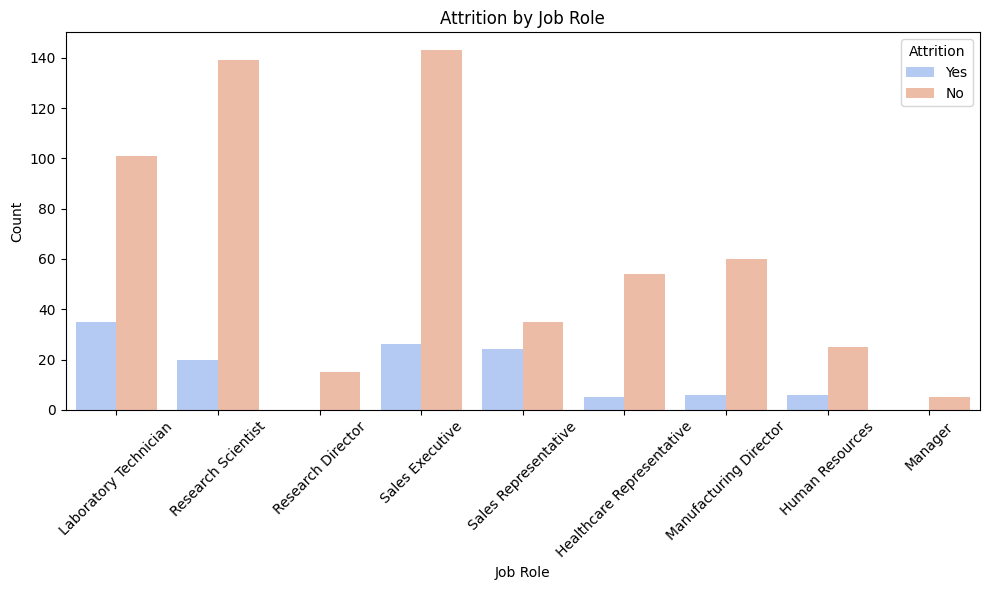

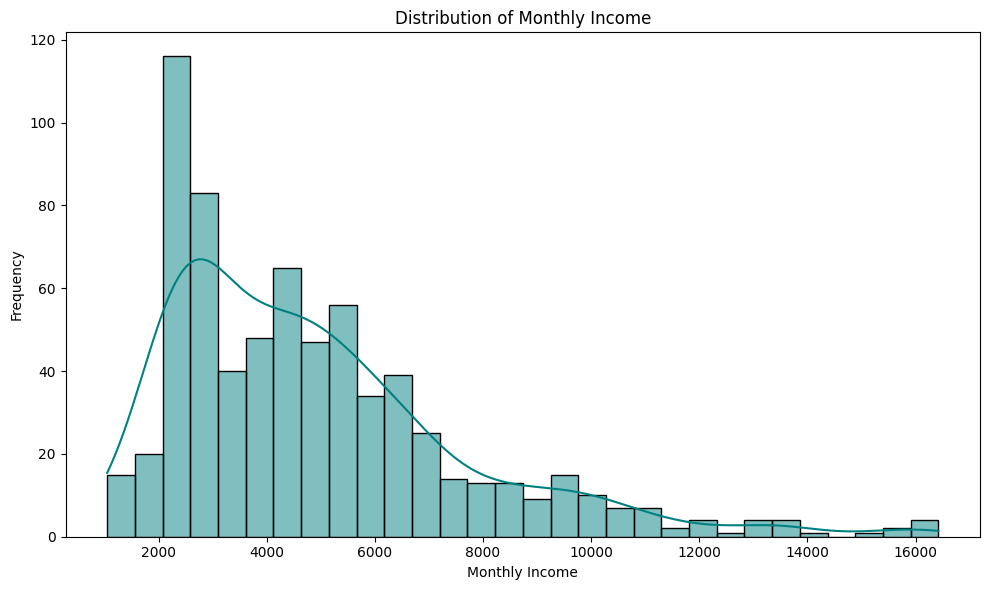

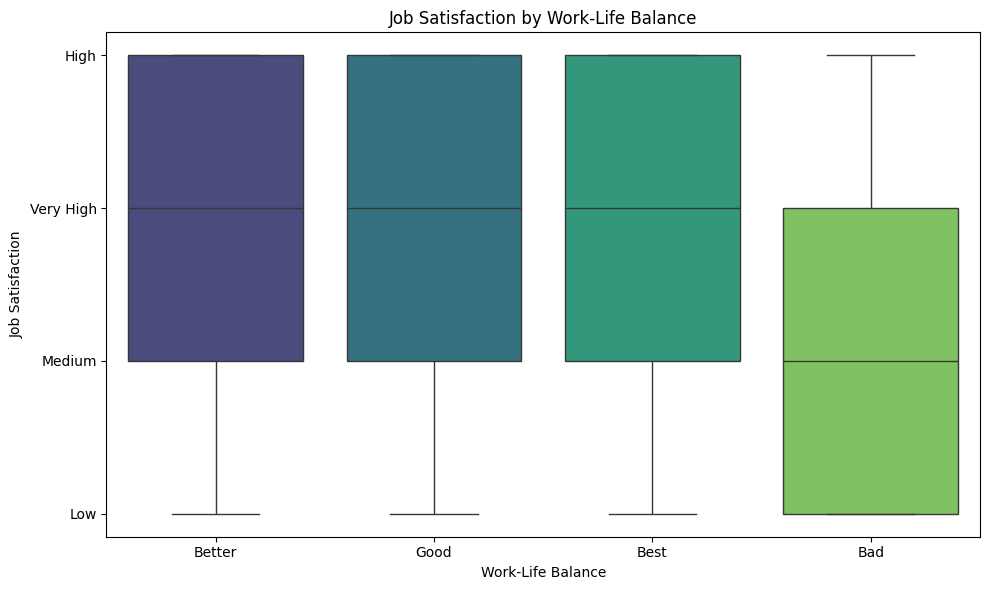

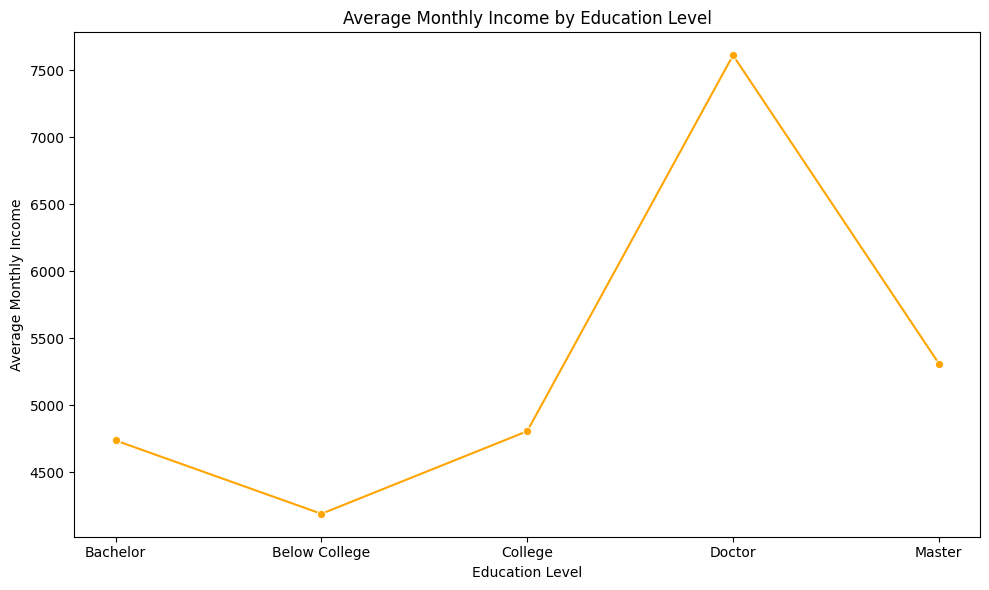

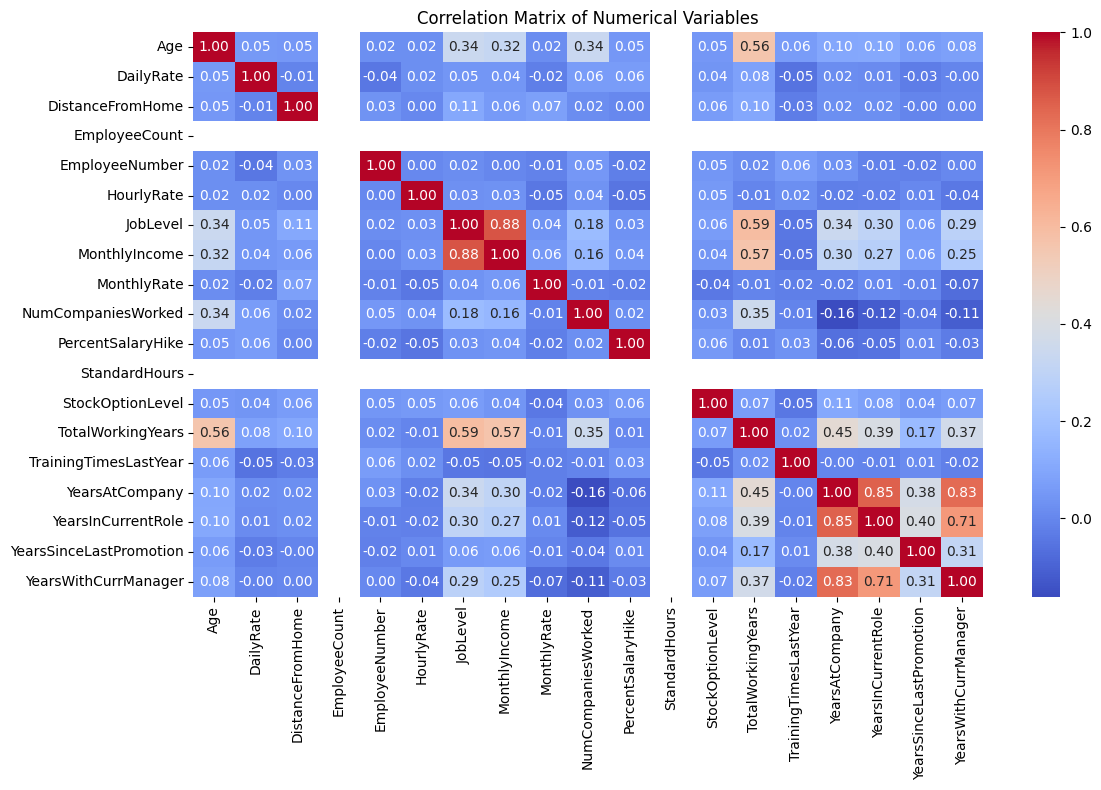

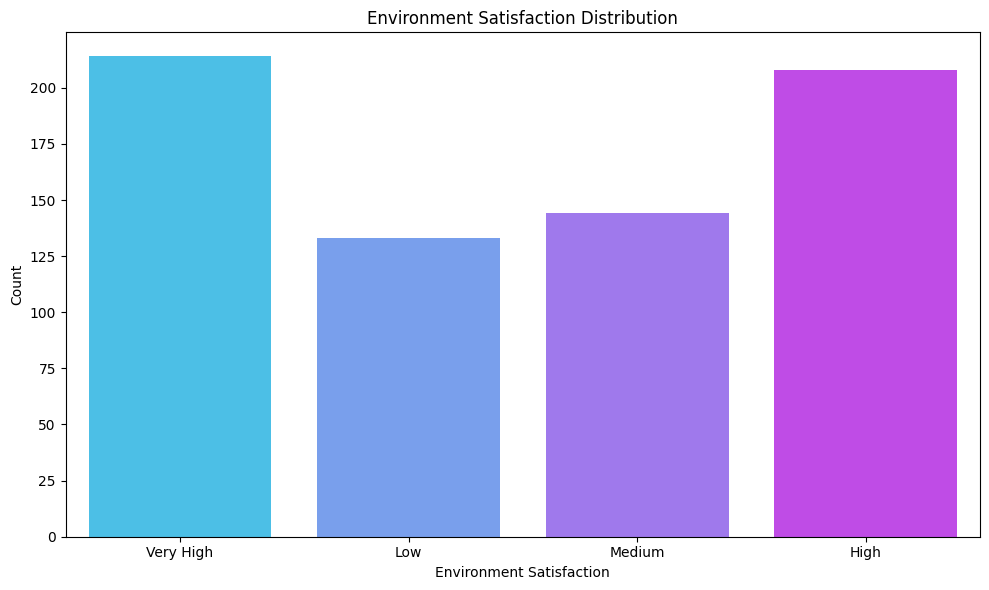

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Map labeled categorical columns for easier interpretation
mapping = {
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'WorkLifeBalance': {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
}

for col, mapping_dict in mapping.items():
    df[col] = df[col].map(mapping_dict)

# Visualization 1: Bar chart of attrition by job role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.savefig('attrition_by_job_role.png')
print("**Caption**: This bar chart shows the distribution of attrition across different job roles. Some roles like Sales Executive have higher attrition.")

# Visualization 2: Histogram of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', kde=True, bins=30, color='teal')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('monthly_income_distribution.png')
print("**Caption**: The histogram reveals the distribution of monthly income, with a concentration of employees earning below 10,000.")

# Visualization 3: Boxplot of Job Satisfaction by WorkLifeBalance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='WorkLifeBalance', y='JobSatisfaction', palette='viridis')
plt.title('Job Satisfaction by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.savefig('job_satisfaction_by_work_life_balance.png')
print("**Caption**: The boxplot indicates that employees with a better work-life balance tend to report higher job satisfaction.")

# Visualization 4: Line plot of Average Monthly Income by Education
education_income = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=education_income, x='Education', y='MonthlyIncome', marker='o', color='orange')
plt.title('Average Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.tight_layout()
plt.savefig('average_income_by_education.png')
print("**Caption**: The line plot highlights a positive correlation between education level and average monthly income.")

# Visualization 5: Heatmap of Correlations between Numerical Variables
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
print("**Caption**: The heatmap shows correlations between numerical variables, revealing strong relationships like MonthlyRate and DailyRate.")

# Visualization 6: Countplot of Environment Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EnvironmentSatisfaction', palette='cool')
plt.title('Environment Satisfaction Distribution')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('environment_satisfaction_distribution.png')
print("**Caption**: Most employees rate their environment satisfaction as High or Very High, indicating general contentment.")